# Simple Linear Regression

## 0.Import lib

In [53]:
# import lib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import scipy.stats as stats

In [54]:
# import data
data = pd.read_csv("FuelConsumption (1).csv")

## 1.Explore Data

In [55]:
data.head()

,Year,MAKE,MODEL,VEHICLE CLASS,ENGINE SIZE,CYLINDERS,TRANSMISSION,FUEL,FUEL CONSUMPTION,COEMISSIONS
0,2000,ACURA,1.6EL,COMPACT,1.6,4,A4,X,10.5,216
1,2000,ACURA,1.6EL,COMPACT,1.6,4,M5,X,9.8,205
2,2000,ACURA,3.2TL,MID-SIZE,3.2,6,AS5,Z,13.7,265
3,2000,ACURA,3.5RL,MID-SIZE,3.5,6,A4,Z,15.0,301
4,2000,ACURA,INTEGRA,SUBCOMPACT,1.8,4,A4,X,11.4,230


In [56]:
data.describe()

,Year,ENGINE SIZE,CYLINDERS,FUEL CONSUMPTION,COEMISSIONS
count,639.0,639.000000,639.000000,639.000000,639.000000
mean,2000.0,3.265728,5.805947,14.713615,296.809077
std,0.0,1.231012,1.625588,3.307044,65.504178
min,2000.0,1.000000,3.000000,4.900000,104.000000
25%,2000.0,2.200000,4.000000,12.500000,253.000000
50%,2000.0,3.000000,6.000000,14.400000,288.000000
75%,2000.0,4.300000,6.000000,16.600000,343.000000
max,2000.0,8.000000,12.000000,30.200000,582.000000


In [57]:
data.isnull().sum()

Year                0
MAKE                0
MODEL               0
VEHICLE CLASS       0
ENGINE SIZE         0
CYLINDERS           0
TRANSMISSION        0
FUEL                0
FUEL CONSUMPTION    0
COEMISSIONS         0
dtype: int64

In [58]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 639 entries, 0 to 638
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Year              639 non-null    int64  
 1   MAKE              639 non-null    object 
 2   MODEL             639 non-null    object 
 3   VEHICLE CLASS     639 non-null    object 
 4   ENGINE SIZE       639 non-null    float64
 5   CYLINDERS         639 non-null    int64  
 6   TRANSMISSION      639 non-null    object 
 7   FUEL              639 non-null    object 
 8   FUEL CONSUMPTION  639 non-null    float64
 9   COEMISSIONS       639 non-null    int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 50.1+ KB


* Kiểm tra dữ liệu trùng lặp

In [59]:
data.loc[data.duplicated(keep=False)]

,Year,MAKE,MODEL,VEHICLE CLASS,ENGINE SIZE,CYLINDERS,TRANSMISSION,FUEL,FUEL CONSUMPTION,COEMISSIONS
377,2000,LAND ROVER,DISCOVERY SERIES II 4X4,SUV,4.0,8,A4,Z,19.6,403
378,2000,LAND ROVER,DISCOVERY SERIES II 4X4,SUV,4.0,8,A4,Z,19.6,403


* Xử lý dữ liệu bị trùng lặp

In [60]:
data.drop_duplicates(inplace=True)

* Giữ lại các cột cần thiết

In [61]:
selection = ['MAKE','ENGINE SIZE','CYLINDERS','FUEL CONSUMPTION','COEMISSIONS ']
data = data[selection]
data

,MAKE,ENGINE SIZE,CYLINDERS,FUEL CONSUMPTION,COEMISSIONS
0,ACURA,1.6,4,10.5,216
1,ACURA,1.6,4,9.8,205
2,ACURA,3.2,6,13.7,265
3,ACURA,3.5,6,15.0,301
4,ACURA,1.8,4,11.4,230
...,...,...,...,...,...
634,VOLVO,2.4,5,14.4,288
635,VOLVO,2.4,5,13.6,274
636,VOLVO,2.3,5,13.9,274
637,VOLVO,2.3,5,13.0,260


* Ta dự đoán rằng:
    - Kích thước động cơ có ảnh hưởng tới mức độ tiêu thụ nhiên liệu
    - Kích thước động cơ có ảnh hưởng tới lượng khí thải
    - Mức độ tiêu thụ nhiên liệu ảnh hưởng tới lượng khí thải
    - Số xi lanh ảnh hưởng tới mức độ tiêu thụ nhiên liệu
    - Số xi lanh ảnh hưởng tới lượng khí thải

* Kiểm tra phân phối của dữ liệu

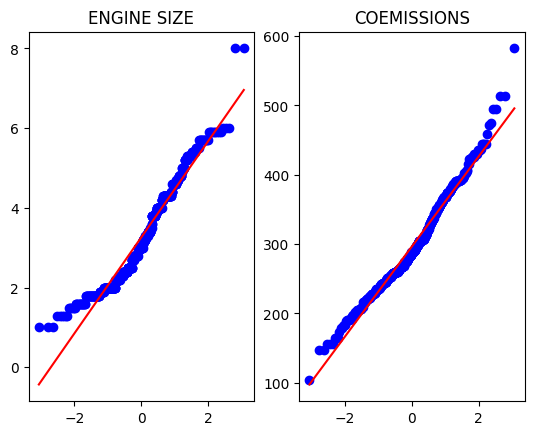

In [62]:
fig, ax = plt.subplots(nrows=1,ncols=2);

stats.probplot(data['ENGINE SIZE'], dist="norm", plot=ax[0]);
ax[0].set_title('ENGINE SIZE');
ax[0].set_xlabel("");  
ax[0].set_ylabel("");  

stats.probplot(data['COEMISSIONS '], dist="norm", plot=ax[1]);
ax[1].set_title('COEMISSIONS');
ax[1].set_xlabel("");
ax[1].set_ylabel("");

* Ta thấy đồ thị q-q plot của các cột dữ liệu đều nằm trên 1 đường thẳng => theo quy tắc bút chỉ béo, các cột dữ liệu có pp chuẩn

## 2.Build Model

* Tập trung xây dựng mô hình hồi quy cho biến X: Độ lớn của động cơ, Y: Mức độ ô nhiễm môi trường

In [63]:
x = data['ENGINE SIZE']
y = data['COEMISSIONS ']

* Phương pháp bình phương cực tiểu

In [64]:
Sxx = lambda x: ((x - np.mean(x)) ** 2).sum()
Sxy = lambda x, y: ((x - np.mean(x))*(y- np.mean(y))).sum()

# ham tinh ra hs chan b0 va hs goc b1
def My_Regession(x,y):

    b1 = Sxy(x,y) / Sxx(x)

    b0 = np.mean(y) - b1*np.mean(x)

    return [b0,b1]


In [92]:
b0 , b1 = My_Regession(x,y)
print(f"Mô hình hồi quy thực nghiệm: y^ = {round(b0,2)} + {round(b1,2)}x")

b0 = round(b0,4)
b1 = round(b1,4)

Mô hình hồi quy thực nghiệm: y^ = 149.22 + 45.16x


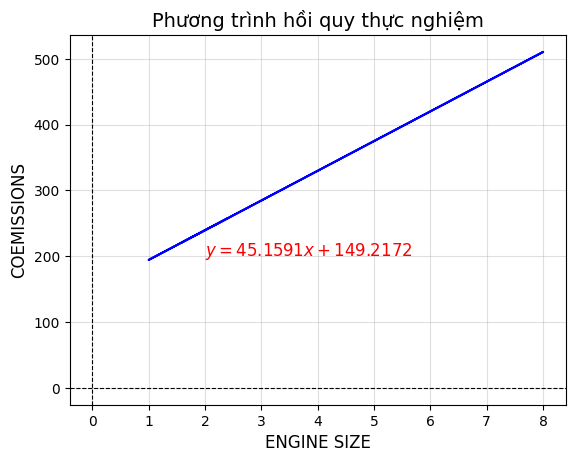

In [96]:
# Vẽ đồ thị
plt.plot(x, b0 + b1*x, label=f"y = {b1}x + {b0}", color="blue");

# Hiển thị phương trình bên cạnh đường thẳng
x_pos = 2;  # Vị trí x để đặt phương trình
y_pos = 200;  # Tính y tương ứng tại x_pos
plt.text(x_pos, y_pos, f"$y = {b1}x + {b0}$", fontsize=12, color="red");

# Thêm chú thích
plt.axhline(0, color='black', linewidth=0.8, linestyle="--");  # Trục x
plt.axvline(0, color='black', linewidth=0.8, linestyle="--");  # Trục y
plt.title("Phương trình hồi quy thực nghiệm", fontsize=14);
plt.xlabel("ENGINE SIZE", fontsize=12);
plt.ylabel("COEMISSIONS", fontsize=12);
plt.grid(alpha=0.4);
plt.show();


## 3. Hypothesis Testing

- Kiểm định giả thuyết: Độ lớn của động cơ có liên quan tới lượng khí thải phát ra.
  - H0: b1 = 0
  - H1: b1 ≠ 0

* Phương pháp kiểm định giả thuyết

In [67]:
SSt = lambda y: ((y - np.mean(y))**2).sum()
SSr = lambda x,y: My_Regession(x,y)[1]*Sxy(x,y)
SSe = lambda x,y: SSt(y) - SSr(x,y)
s = lambda x,y: np.sqrt(SSe(x,y) / (len(x) - 2) )

In [68]:
# ham kiem tra gia thuyet co bac bo H0 khong
def Hypothesis_testing(x,y, alpha):
    df=len(x)-2
    t0 = round(My_Regession(x,y)[1] / s(x,y)*np.sqrt(Sxx(x)),4)

    cantren = round(stats.t.ppf(1 - alpha/2, df=len(x)-2),4)
    canduoi = round(stats.t.ppf(alpha/2, df=len(x)-2),4)

    if (t0 > cantren) | (t0 < canduoi):
        a = np.linspace(-4, 4, 1000)
        b = stats.t.pdf(a, df)

        plt.plot(a, b, label=f"Đồ thị phân phối student (n={df})")

        plt.fill_between(a, b, where=(a >= cantren) | (a <= canduoi), color='red', alpha=alpha, label="Miền bác bỏ")

        plt.plot(t0, stats.t.pdf(t0, df), 'ro', label=f"Giá trị quan sát t0 = {t0}")

        plt.axvline(x=cantren, color='green', linestyle='--', label=f"Critical t (upper) = {cantren:.2f}")
        plt.axvline(x=canduoi, color='green', linestyle='--', label=f"Critical t (lower) = {canduoi:.2f}")

        plt.title("Bác bỏ giả thuyết H0")
        #plt.xlabel("t-values")
        #plt.ylabel("Probability Density")
        plt.legend()
        plt.show()

    else:
        a = np.linspace(-4, 4, 1000)
        b = stats.t.pdf(a, df)

        plt.plot(a, b, label=f"Đồ thị phân phối student (n={df})")

        plt.fill_between(a, b, where=(a >= cantren) | (a <= canduoi), color='red', alpha=alpha, label="Miền bác bỏ")

        plt.plot(t0, stats.t.pdf(t0, df), 'ro', label=f"Giá trị quan sát t0 = {t0}")

        plt.axvline(x=cantren, color='green', linestyle='--', label=f"Cận trên = {cantren}")
        plt.axvline(x=canduoi, color='green', linestyle='--', label=f"Cận dưới = {canduoi}")

        plt.title("Chưa có cơ sở bác bỏ giả thuyết H0")
        #plt.xlabel("t-values")
        #plt.ylabel("Probability Density")
        plt.legend()
        plt.show()

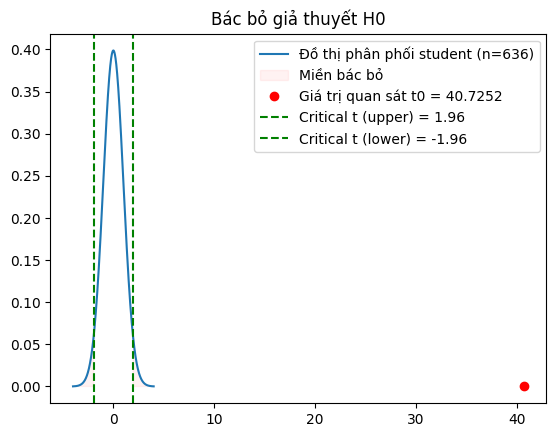

In [69]:
Hypothesis_testing(x,y,0.05)

- Phương pháp phân tích phương sai, lập bảng ANOVA

In [70]:
def Analysis_of_Variance(x,y,alpha):
    df1, df2 = [1,len(x) - 2]

    f0 = round(SSr(x,y)*df2 / SSe(x,y), 4)

    mocbacbo = round(stats.f.ppf(1 - alpha, df1, df2),4)

    if f0 > mocbacbo:
        a = np.linspace(0, 10, 2000)  
        b = stats.f.pdf(a, df1, df2)   
        
        plt.figure(figsize=(15, 6))
 
        plt.plot(a, b, label="Phân phối Fisher", color="blue")

        plt.fill_between(a, b, where=(a >= mocbacbo), color='red', alpha=0.5, label="Miền bác bỏ")

        plt.plot(f0, stats.f.pdf(f0, df1, df2), 'ro', label=f"Giá trị quan sát f0 = {f0}")

        plt.axvline(mocbacbo, color='green', linestyle='--', label=f"Mốc bác bỏ F = {mocbacbo}")

        plt.title("Bác bỏ giả thuyết H0")
        #plt.xlabel("F-value")
        #plt.ylabel("Probability Density")
        plt.legend()

        plt.show()

    else:
        a = np.linspace(0, 10, 2000)  
        b = stats.f.pdf(a, df1, df2)   
        
        plt.figure(figsize=(15, 6))
 
        plt.plot(a, b, label="Phân phối Fisher", color="blue")

        plt.fill_between(a, b, where=(a >= mocbacbo), color='red', alpha=0.5, label="Miền bác bỏ")

        plt.plot(f0, stats.f.pdf(f0, df1, df2), 'ro', label=f"Giá trị quan sát f0 = {f0}")

        plt.axvline(mocbacbo, color='green', linestyle='--', label=f"Mốc bác bỏ F = {mocbacbo}")

        plt.title("Chưa có cơ sở bác bỏ giả thuyết H0")
        #plt.xlabel("F-value")
        #plt.ylabel("Probability Density")
        plt.legend()

        plt.show()
    
    return f0


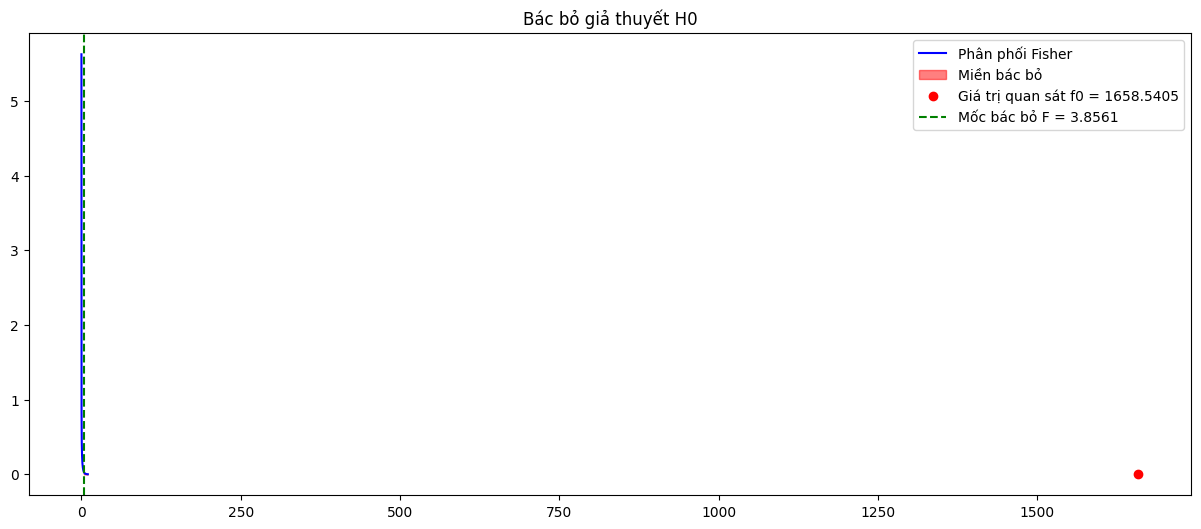

np.float64(1658.5405)

In [71]:
Analysis_of_Variance(x,y,0.05)

    - Do bậc df1 = 1 nên đồ thị khác so với đồ thị mọi người hay gặp, phần màu đỏ rất rất nhỏ là miền bác bỏ (phần bên phải đường gióng lên màu xanh)
    - Để có thể quan sát rõ hơn, ta có thể đến với ví dụ điểm thi GK,CK của môn SLTK trong ví dụ thường làm.
    

In [72]:
a = [39,43,21,64,57,47,28,75,34,52]
b = [65,78,52,82,92,89,73,98,56,75]

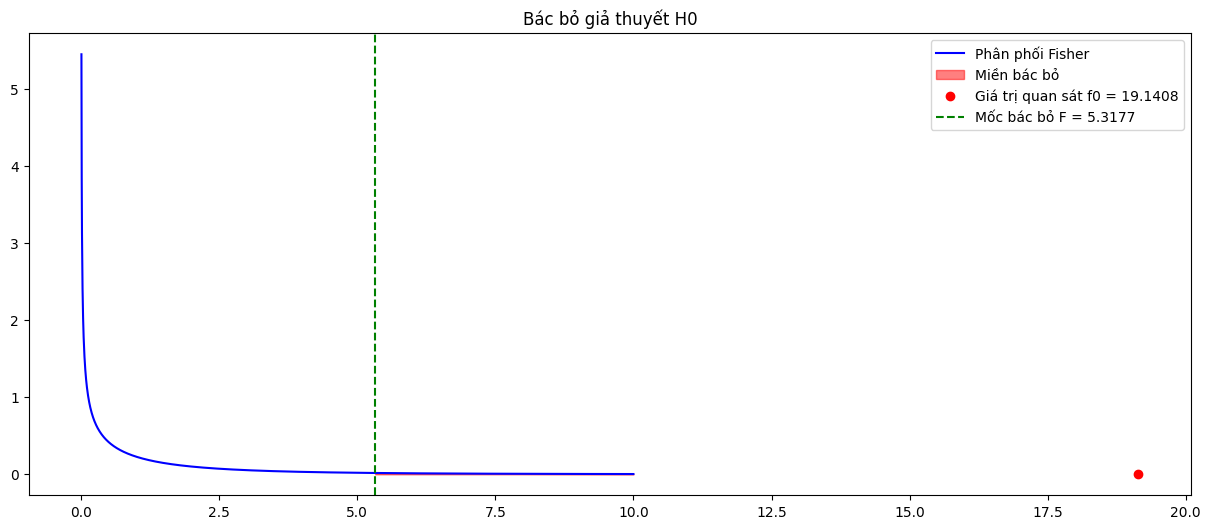

np.float64(19.1408)

In [73]:
Analysis_of_Variance(a,b,0.05)

- Bảng phân tích ANOVA


In [74]:
# hàm in ra bảng phân tích phương sai anova
def print_anova(x,y,alpha):
    anova_table = {
        "Nguồn": ["Hồi quy", "Sai số", "Tổng"],
        "Tổng bình phương": [SSr(x,y), SSe(x,y), SSt(y)],
        "Bậc tự do": [1, len(x)-2, ""],
        "Bình phương trung bình": [SSr(x,y)/1, SSe(x,y)/(len(x)-2), ""],
        "f0": ["", "", round(SSr(x,y)*(len(x)-2) / SSe(x,y), 4)]}

    anova_df = pd.DataFrame(anova_table)
    return anova_df


print_anova(a,b,0.05)

,Nguồn,Tổng bình phương,Bậc tự do,Bình phương trung bình,f0
0,Hồi quy,1449.974131,1,1449.974131,
1,Sai số,606.025869,8,75.753234,
2,Tổng,2056.000000,,,19.1408


## 4.Residual Analysis

In [75]:
# tính phần dư
b0, b1 = My_Regession(x,y)
y_reg = b0 + b1*x
ei = y - y_reg

- Giả định tuyến tính

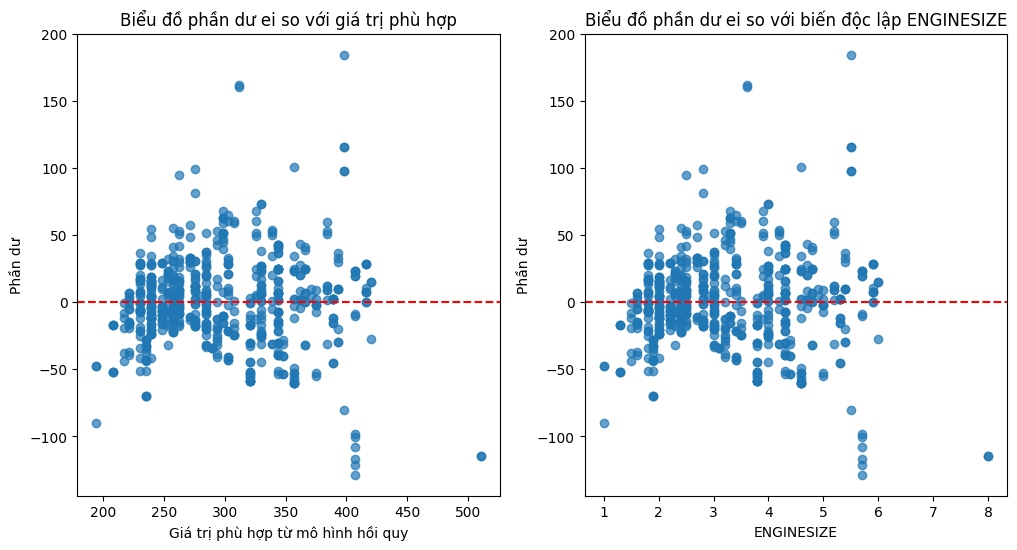

In [103]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6));

# Biểu đồ phần dư so với giá trị phù hợp
ax[0].scatter(y_reg, ei, alpha=0.7);
ax[0].axhline(0, color='red', linestyle='--');
ax[0].set_title("Biểu đồ phần dư ei so với giá trị phù hợp");
ax[0].set_xlabel("Giá trị phù hợp từ mô hình hồi quy");
ax[0].set_ylabel("Phần dư");

# Biểu đồ phần dư so với biến độc lập (ENGINESIZE)
ax[1].scatter(x, ei, alpha=0.7);
ax[1].axhline(0, color='red', linestyle='--');
ax[1].set_title("Biểu đồ phần dư ei so với biến độc lập ENGINESIZE");
ax[1].set_xlabel("ENGINESIZE");
ax[1].set_ylabel("Phần dư");



    - Từ biểu đồ phần dư, ta thấy nó rơi vào tình huống lý tưởng
    

- Kiểm tra tính độc lập của phần dư
    - Sử dụng biểu đồ tự tương quan (ACF - Autocorrelation Function)
        - Biểu đồ tự tương quan giúp kiểm tra xem các phần dư có phụ thuộc vào nhau ở các độ trễ khác nhau hay không. Nếu các phần dư không độc lập, ACF sẽ cho thấy sự tự tương quan ở các độ trễ (lag) khác nhau.
        - Tương quan mạnh mẽ (Strong Autocorrelation):Nếu các cột trong biểu đồ ACF có giá trị rất gần với 1 hoặc -1 tại các độ trễ, điều này cho thấy các phần dư tại các thời điểm khác nhau có sự liên kết chặt chẽ với nhau.
        - Tương quan yếu (Weak Autocorrelation): Nếu giá trị ACF gần 0, điều này cho thấy không có sự tự tương quan hoặc chỉ có sự tự tương quan rất yếu giữa các phần dư tại các thời điểm khác nhau.

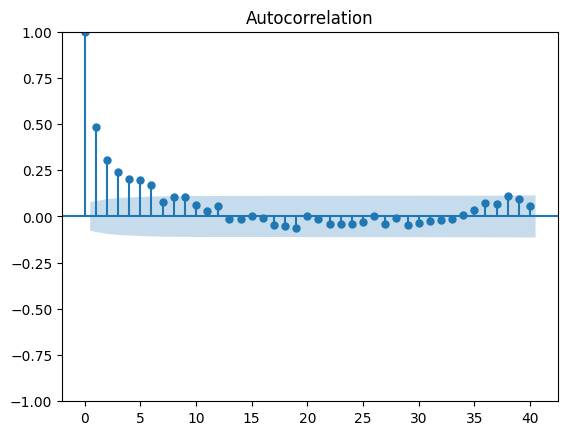

In [77]:
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(ei, lags=40)  
plt.show()

    - Ta thấy rằng giá trị ACF gần 0, điều này cho thấy không có sự tự tương quan hoặc chỉ có sự tự tương quan rất yếu giữa các phần dư tại các thời điểm khác nhau

- Kiểm tra phân phối chuẩn

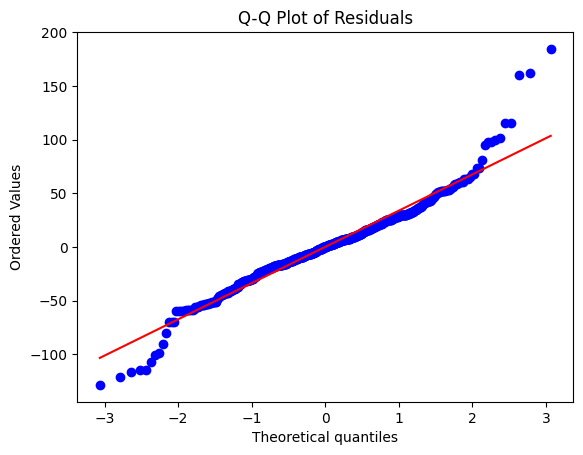

In [78]:
fig, ax = plt.subplots()
stats.probplot(ei, dist="norm", plot=ax)
ax.set_title("Q-Q Plot of Residuals")
plt.show()

    - Ta thấy được phần dư xấp xỉ phân phối chuẩn

* Từ đó ta thấy phương sai thỏa mãn các điều kiện ban đầu:
    - Độc lập
    - Kỳ vọng = 0, Phương sai cố định
    - Tuân theo phân phối chuẩn

## 5.Coefficient of determination (R^2)

- Đo lường sự giải thích của biến độc lập lên biến phụ thuộc

In [111]:
r2 = round(SSr(x,y) / SSt(y),4)
print(f"Biến độc lập ENGINESIZE giải thích được {r2*100}% biến phụ thuộc COEMISSIONS")

Biến độc lập ENGINESIZE giải thích được 72.28% biến phụ thuộc COEMISSIONS


## 6.Prediction

- Sử dụng mô hình để dự báo lượng khí thải phát ra khi có dữ liệu về độ lớn động cơ

In [116]:
# Sử dụng ngẫu nhiên một size động cơ
a = 3.5
print(f"Lượng khí thải do xe này phát ra là: {b0+b1*a}")
data[data['ENGINE SIZE'] == 3.5]

Lượng khí thải do xe này phát ra là: 307.27405


,MAKE,ENGINE SIZE,CYLINDERS,FUEL CONSUMPTION,COEMISSIONS
3,ACURA,3.5,6,15.0,301
134,CHRYSLER,3.5,6,14.4,283
142,CHRYSLER,3.5,6,14.4,283
143,CHRYSLER,3.5,6,14.7,288
329,HONDA,3.5,6,14.9,292
353,ISUZU,3.5,6,17.8,366
354,ISUZU,3.5,6,17.9,368
458,OLDSMOBILE,3.5,6,14.7,283
460,PLYMOUTH,3.5,6,15.4,308


    - 307.27405 là lượng phát thải trung bình của các hãng xe có độ lớn động cơ là 3.5
    - Từ đó ta thấy được ngoài độ lớn động cơ, hãng sản xuất xe cũng là 1 yếu tố ảnh hưởng đến lượng khí thải

# Multiple Linear Regression